In [1]:
#!pip install numpy
#!pip install pandas
# !pip install scipy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install plotly-express
#!pip install sklearn.preprocessing
import numpy as np
import pandas as pd
!pip install scikit-learn
!pip install sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [2]:
from re import I


data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [3]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2023-05-24,2023-05-24,Run,541,4.65285,2704,9.68301,0.456555,6.19642,131.4190,149.0,7110.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7292053159
1,2023-05-22,2023-05-22,Run,543,4.65168,2731,9.77750,5.351480,6.13654,11.2118,145.0,7143.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7287459745
2,2023-05-20,2023-05-20,Run,569,4.23913,2834,11.13340,0.482923,5.38917,124.2430,152.0,7633.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7283442016
3,2023-05-19,2023-05-19,Run,624,4.65109,2722,9.75349,0.447952,6.15165,133.9430,0.0,6847.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7281605500
4,2023-05-17,2023-05-17,Run,603,4.49956,2635,9.75532,0.990110,6.15049,60.5993,0.0,6853.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7278574366


In [4]:
data.shape

(822, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          822 non-null    object 
 1   Workout Date            822 non-null    object 
 2   Activity Type           822 non-null    object 
 3   Calories Burned (kCal)  822 non-null    int64  
 4   Distance (mi)           822 non-null    float64
 5   Workout Time (seconds)  822 non-null    int64  
 6   Avg Pace (min/mi)       822 non-null    float64
 7   Max Pace (min/mi)       822 non-null    float64
 8   Avg Speed (mi/h)        822 non-null    float64
 9   Max Speed (mi/h)        822 non-null    float64
 10  Avg Heart Rate          565 non-null    float64
 11  Steps                   799 non-null    float64
 12  Notes                   822 non-null    object 
 13  Source                  822 non-null    object 
 14  Link                    822 non-null    ob

In [6]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes', 'Max Pace (min/mi)', 'Max Speed (mi/h)'], inplace=True)

In [7]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,2023-05-24,2023-05-24,Run,541,4.65285,2704,9.68301,6.19642,149.0,7110.0,498
1,2023-05-22,2023-05-22,Run,543,4.65168,2731,9.77750,6.13654,145.0,7143.0,497
2,2023-05-20,2023-05-20,Run,569,4.23913,2834,11.13340,5.38917,152.0,7633.0,464
3,2023-05-19,2023-05-19,Run,624,4.65109,2722,9.75349,6.15165,0.0,6847.0,496
4,2023-05-17,2023-05-17,Run,603,4.49956,2635,9.75532,6.15049,0.0,6853.0,480


In [8]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Avg Speed (mi/h)            0
Avg Heart Rate            257
Steps                      23
target                      0
dtype: int64

In [9]:
# data['Date Submitted'] = pd.to_datetime(data['Date Submitted'], format='%Y-%m-%d')
# data['Workout Date'] = pd.to_datetime(data['Workout Date'], format='%Y-%m-%d')

In [10]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
count,822.000000,822.000000,822.000000,822.000000,822.000000,565.000000,799.000000,822.000000
mean,418.080292,3.289631,2151.145985,11.327228,5.554572,113.909735,5319.102628,298.725061
std,265.806072,2.045302,1317.047842,6.563436,1.607701,59.750136,3311.392641,165.192317
min,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,266.000000,2.234360,1539.250000,9.154843,5.235967,107.000000,3757.000000,180.250000
50%,405.000000,3.100000,1815.000000,9.813265,6.068610,145.000000,4735.000000,283.000000
75%,467.000000,3.739928,2540.000000,10.994975,6.486700,154.000000,6134.000000,424.750000
max,1928.000000,13.481600,11065.000000,123.477000,14.863700,173.000000,23604.000000,613.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
d1 = data.sort_values(by='Avg Pace (min/mi)', ascending=False)
data.head(30)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,2023-05-24,2023-05-24,Run,541,4.65285,2704,9.68301,6.19642,149.0,7110.0,498
1,2023-05-22,2023-05-22,Run,543,4.65168,2731,9.77750,6.13654,145.0,7143.0,497
2,2023-05-20,2023-05-20,Run,569,4.23913,2834,11.13340,5.38917,152.0,7633.0,464
3,2023-05-19,2023-05-19,Run,624,4.65109,2722,9.75349,6.15165,0.0,6847.0,496
4,2023-05-17,2023-05-17,Run,603,4.49956,2635,9.75532,6.15049,0.0,6853.0,480
5,2023-05-16,2023-05-16,Run,539,4.59691,2877,10.42310,5.75645,145.0,7650.0,490
6,2023-05-14,2023-05-14,Run,401,3.26102,2156,11.01430,5.44746,128.0,5550.0,371
7,2023-05-13,2023-05-13,Run,621,4.60679,2732,9.88183,6.07175,0.0,7056.0,491
8,2023-05-11,2023-05-11,Run,559,4.59194,3578,12.98360,4.62122,137.0,7603.0,489
9,2023-05-10,2023-05-10,Run,564,4.53749,3191,11.71690,5.12082,147.0,7168.0,487


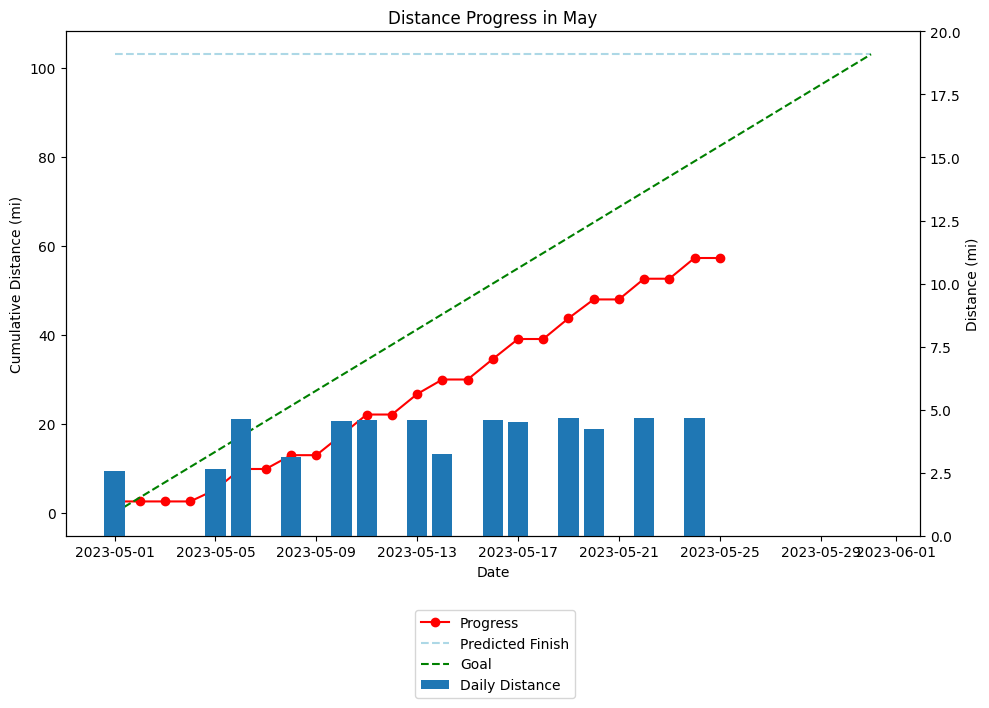

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
data = {
    'Date Submitted': [
        '2023-05-24', '2023-05-22', '2023-05-20', '2023-05-19', '2023-05-17', 
        '2023-05-16', '2023-05-14', '2023-05-13', '2023-05-11', '2023-05-10', 
        '2023-05-08', '2023-05-06', '2023-05-05', '2023-05-01'
    ],
    'Distance (mi)': [
        4.65285, 4.65168, 4.23913, 4.65109, 4.49956, 4.59691, 3.26102, 
        4.60679, 4.59194, 4.53749, 3.10379, 4.63371, 2.65452, 2.55845
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Date Submitted' column to datetime type
df['Date Submitted'] = pd.to_datetime(df['Date Submitted'])

# Filter data for May
may_data = df[df['Date Submitted'].dt.month == 5]

# Sort data by date in ascending order
may_data = may_data.sort_values('Date Submitted')

# Create a date range from May 1 to May 31
date_range = pd.date_range(start='2023-05-01', end='2023-05-31')

# Reindex the dataframe with the complete date range
may_data = may_data.set_index('Date Submitted').reindex(date_range).reset_index()

# Forward-fill the missing values with 0
may_data['Distance (mi)'] = may_data['Distance (mi)'].fillna(0)

# Calculate cumulative sum of distance for each day in May
may_data['Cumulative Distance'] = may_data['Distance (mi)'].cumsum()

# Calculate the remaining distance to reach the goal
may_data['Remaining Distance'] = 103 - may_data['Cumulative Distance']

# Get today's date
today = pd.Timestamp('2023-05-25')

# Filter data until today
progress_data = may_data[may_data['index'] <= today]

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the daily distance as bars on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim(0, 20)
ax2.set_ylabel('Distance (mi)')

ax2.bar(may_data['index'], may_data['Distance (mi)'], label='Daily Distance')

# Set labels for the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Distance (mi)')

# Plot the cumulative distance on the first y-axis
ax1.plot(progress_data['index'], progress_data['Cumulative Distance'], marker='o', linestyle='-', color='r', label='Progress')

# Plot the remaining distance as predicted finish (light blue color)
ax1.plot(may_data['index'], may_data['Cumulative Distance'] + may_data['Remaining Distance'], linestyle='--', color='lightblue', label='Predicted Finish')

# Plot the goal line on the first y-axis
ax1.plot([may_data['index'].min(), may_data['index'].max()], [0, 103], linestyle='--', color='g', label='Goal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legends and title
fig.legend(loc='center', bbox_to_anchor=(0.5, -0.1))
plt.title('Distance Progress in May')

# Display the chart
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import plotly.graph_objects as go

# Sample data
data = {
    'Date Submitted': [
        '2023-05-24', '2023-05-22', '2023-05-20', '2023-05-19', '2023-05-17', 
        '2023-05-16', '2023-05-14', '2023-05-13', '2023-05-11', '2023-05-10', 
        '2023-05-08', '2023-05-06', '2023-05-05', '2023-05-01'
    ],
    'Distance (mi)': [
        4.65285, 4.65168, 4.23913, 4.65109, 4.49956, 4.59691, 3.26102, 
        4.60679, 4.59194, 4.53749, 3.10379, 4.63371, 2.65452, 2.55845
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Date Submitted' column to datetime type
df['Date Submitted'] = pd.to_datetime(df['Date Submitted'])

# Filter data for May
may_data = df[df['Date Submitted'].dt.month == 5]

# Sort data by date in ascending order
may_data = may_data.sort_values('Date Submitted')

# Create a date range from May 1 to May 31
date_range = pd.date_range(start='2023-05-01', end='2023-05-31')

# Reindex the dataframe with the complete date range
may_data = may_data.set_index('Date Submitted').reindex(date_range).reset_index()

# Forward-fill the missing values with 0
may_data['Distance (mi)'] = may_data['Distance (mi)'].fillna(0)

# Calculate cumulative sum of distance for each day in May
may_data['Cumulative Distance'] = may_data['Distance (mi)'].cumsum()

# Calculate the remaining distance to reach the goal
may_data['Remaining Distance'] = 103 - may_data['Cumulative Distance']

# Get today's date
today = pd.Timestamp('2023-05-25')

# Filter data until today
progress_data = may_data[may_data['index'] <= today]

# Create the figure
fig = go.Figure()

# Add daily distance as bar chart
fig.add_trace(go.Bar(
    x=may_data['index'],
    y=may_data['Distance (mi)'],
    name='Daily Distance',
    yaxis='y2'
))

# Add cumulative distance as line chart
fig.add_trace(go.Scatter(
    x=progress_data['index'],
    y=progress_data['Cumulative Distance'],
    mode='lines+markers',
    name='Progress',
    line=dict(color='red')
))

# Add predicted finish line
fig.add_trace(go.Scatter(
    x=may_data['index'],
    y=may_data['Cumulative Distance'] + may_data['Remaining Distance'],
    mode='lines',
    name='Predicted Finish',
    line=dict(color='lightblue', dash='dash')
))

# Set axis labels and titles
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative Distance (mi)'),
    yaxis2=dict(title='Daily Distance (mi)', overlaying='y', side='right', range=[0, 20]),
    legend=dict(x=0.5, y=-0.15),
    title='Distance Progress in May',
    height=600,
    width=900
)

# Show the chart
fig.show()


In [15]:
# data = data[data['Avg Pace (min/mi)'] < 20]
# data = data[data['Avg Pace (min/mi)'] > 0]
# data = data[data['Max Pace (min/mi)'] < 20]
# data = data[data['Max Pace (min/mi)'] > 0]
# data.head(11)
data['Avg Heart Rate'].fillna(data['Avg Heart Rate'].median(), inplace=True)
data.fillna(0, inplace=True)
# data.sort_values(by='Avg Pace (min/mi)', ascending=False)

#replace the extremely large values with the median
data.loc[data['Avg Pace (min/mi)'] > 20, 'Avg Pace (min/mi)'] = data['Avg Pace (min/mi)'].median()
#Use numpy instead of pandas to calculate the median
data['Avg Heart Rate'] = np.where(data['Avg Heart Rate'] < 30, data['Avg Heart Rate'].median(), data['Avg Heart Rate'])

KeyError: 'Avg Heart Rate'

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

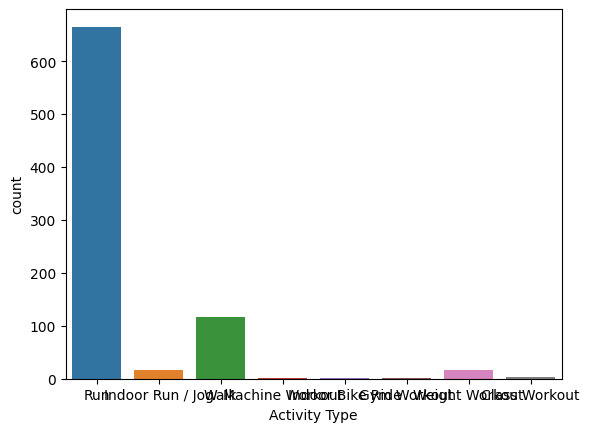

In [ ]:
sns.countplot(x='Activity Type', data=data)

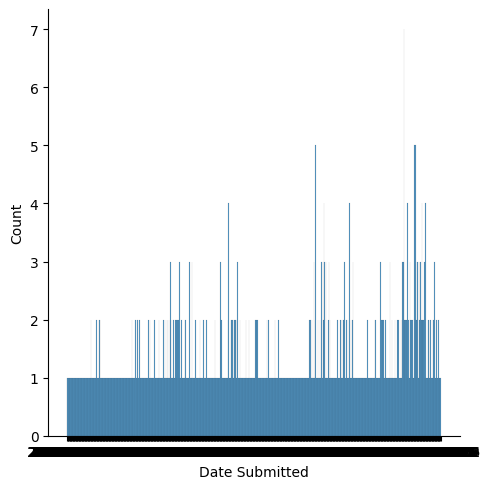

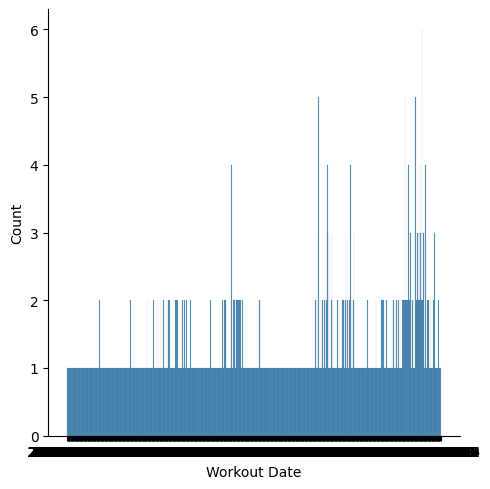

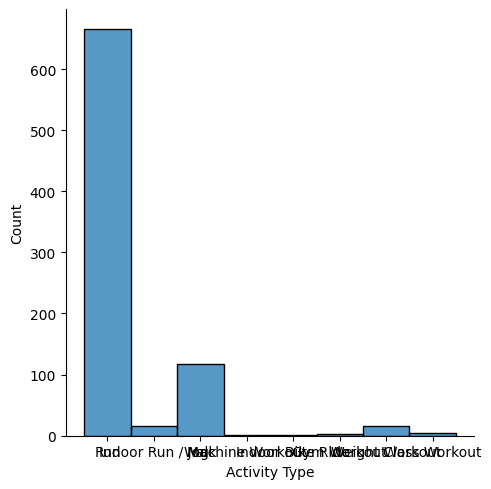

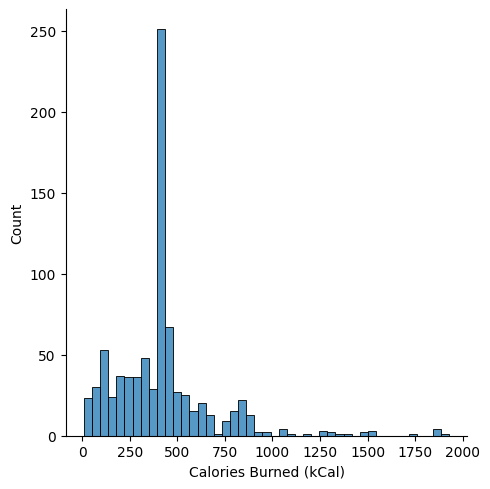

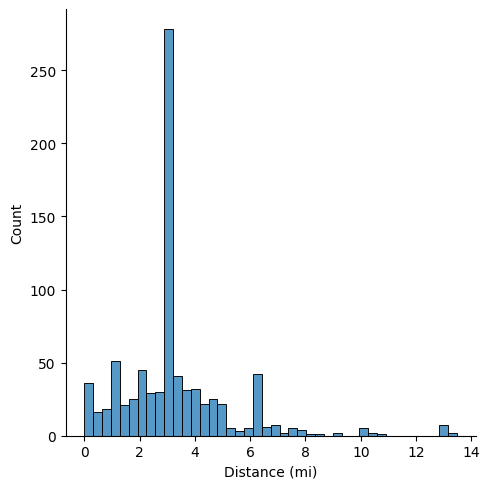

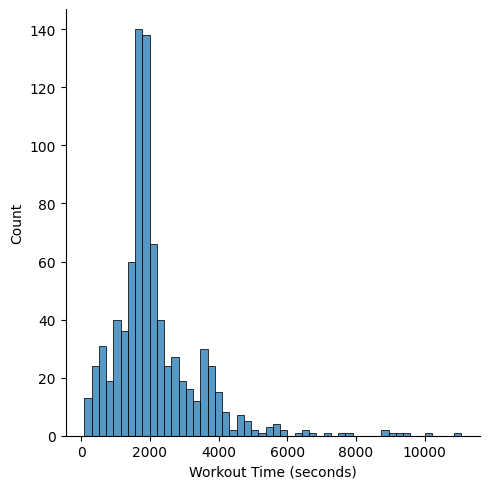

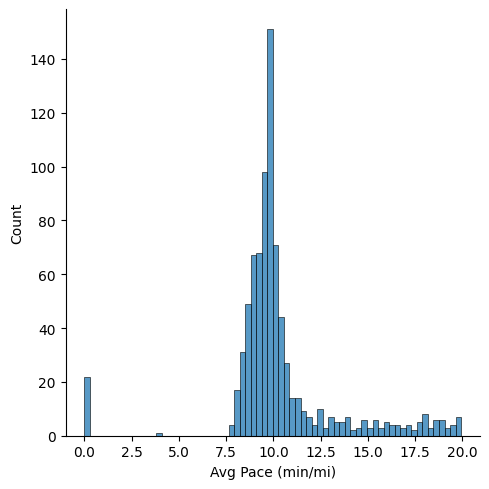

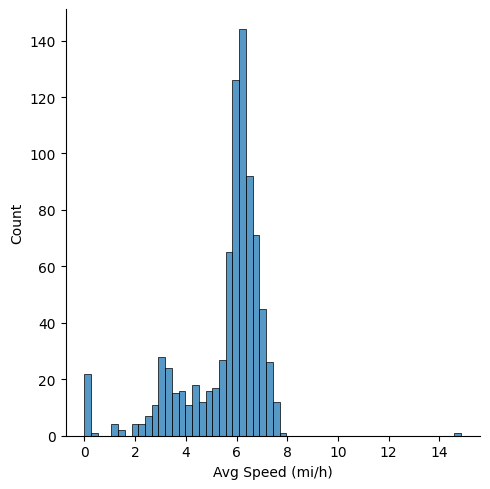

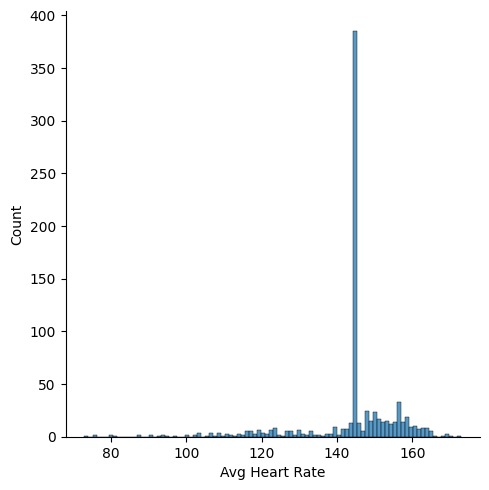

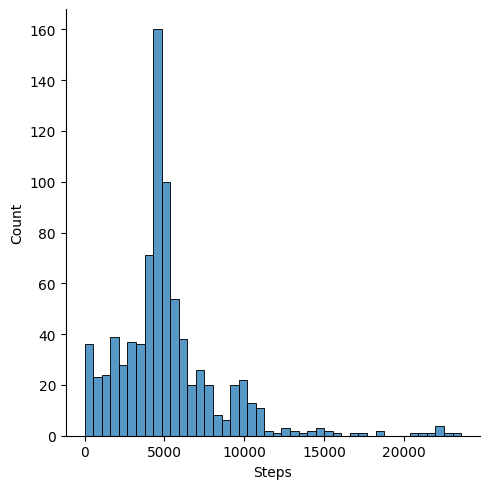

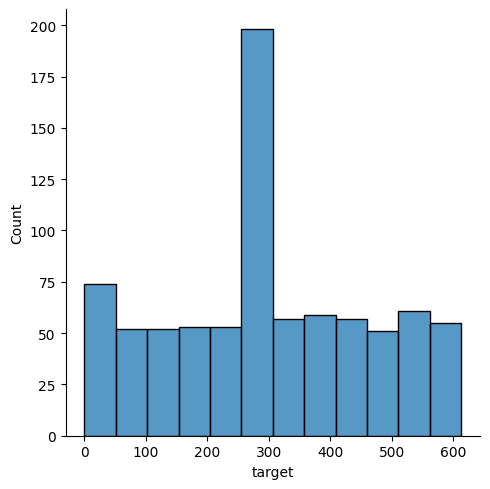

In [ ]:
for column in data:
    sns.displot(x=column, data=data)

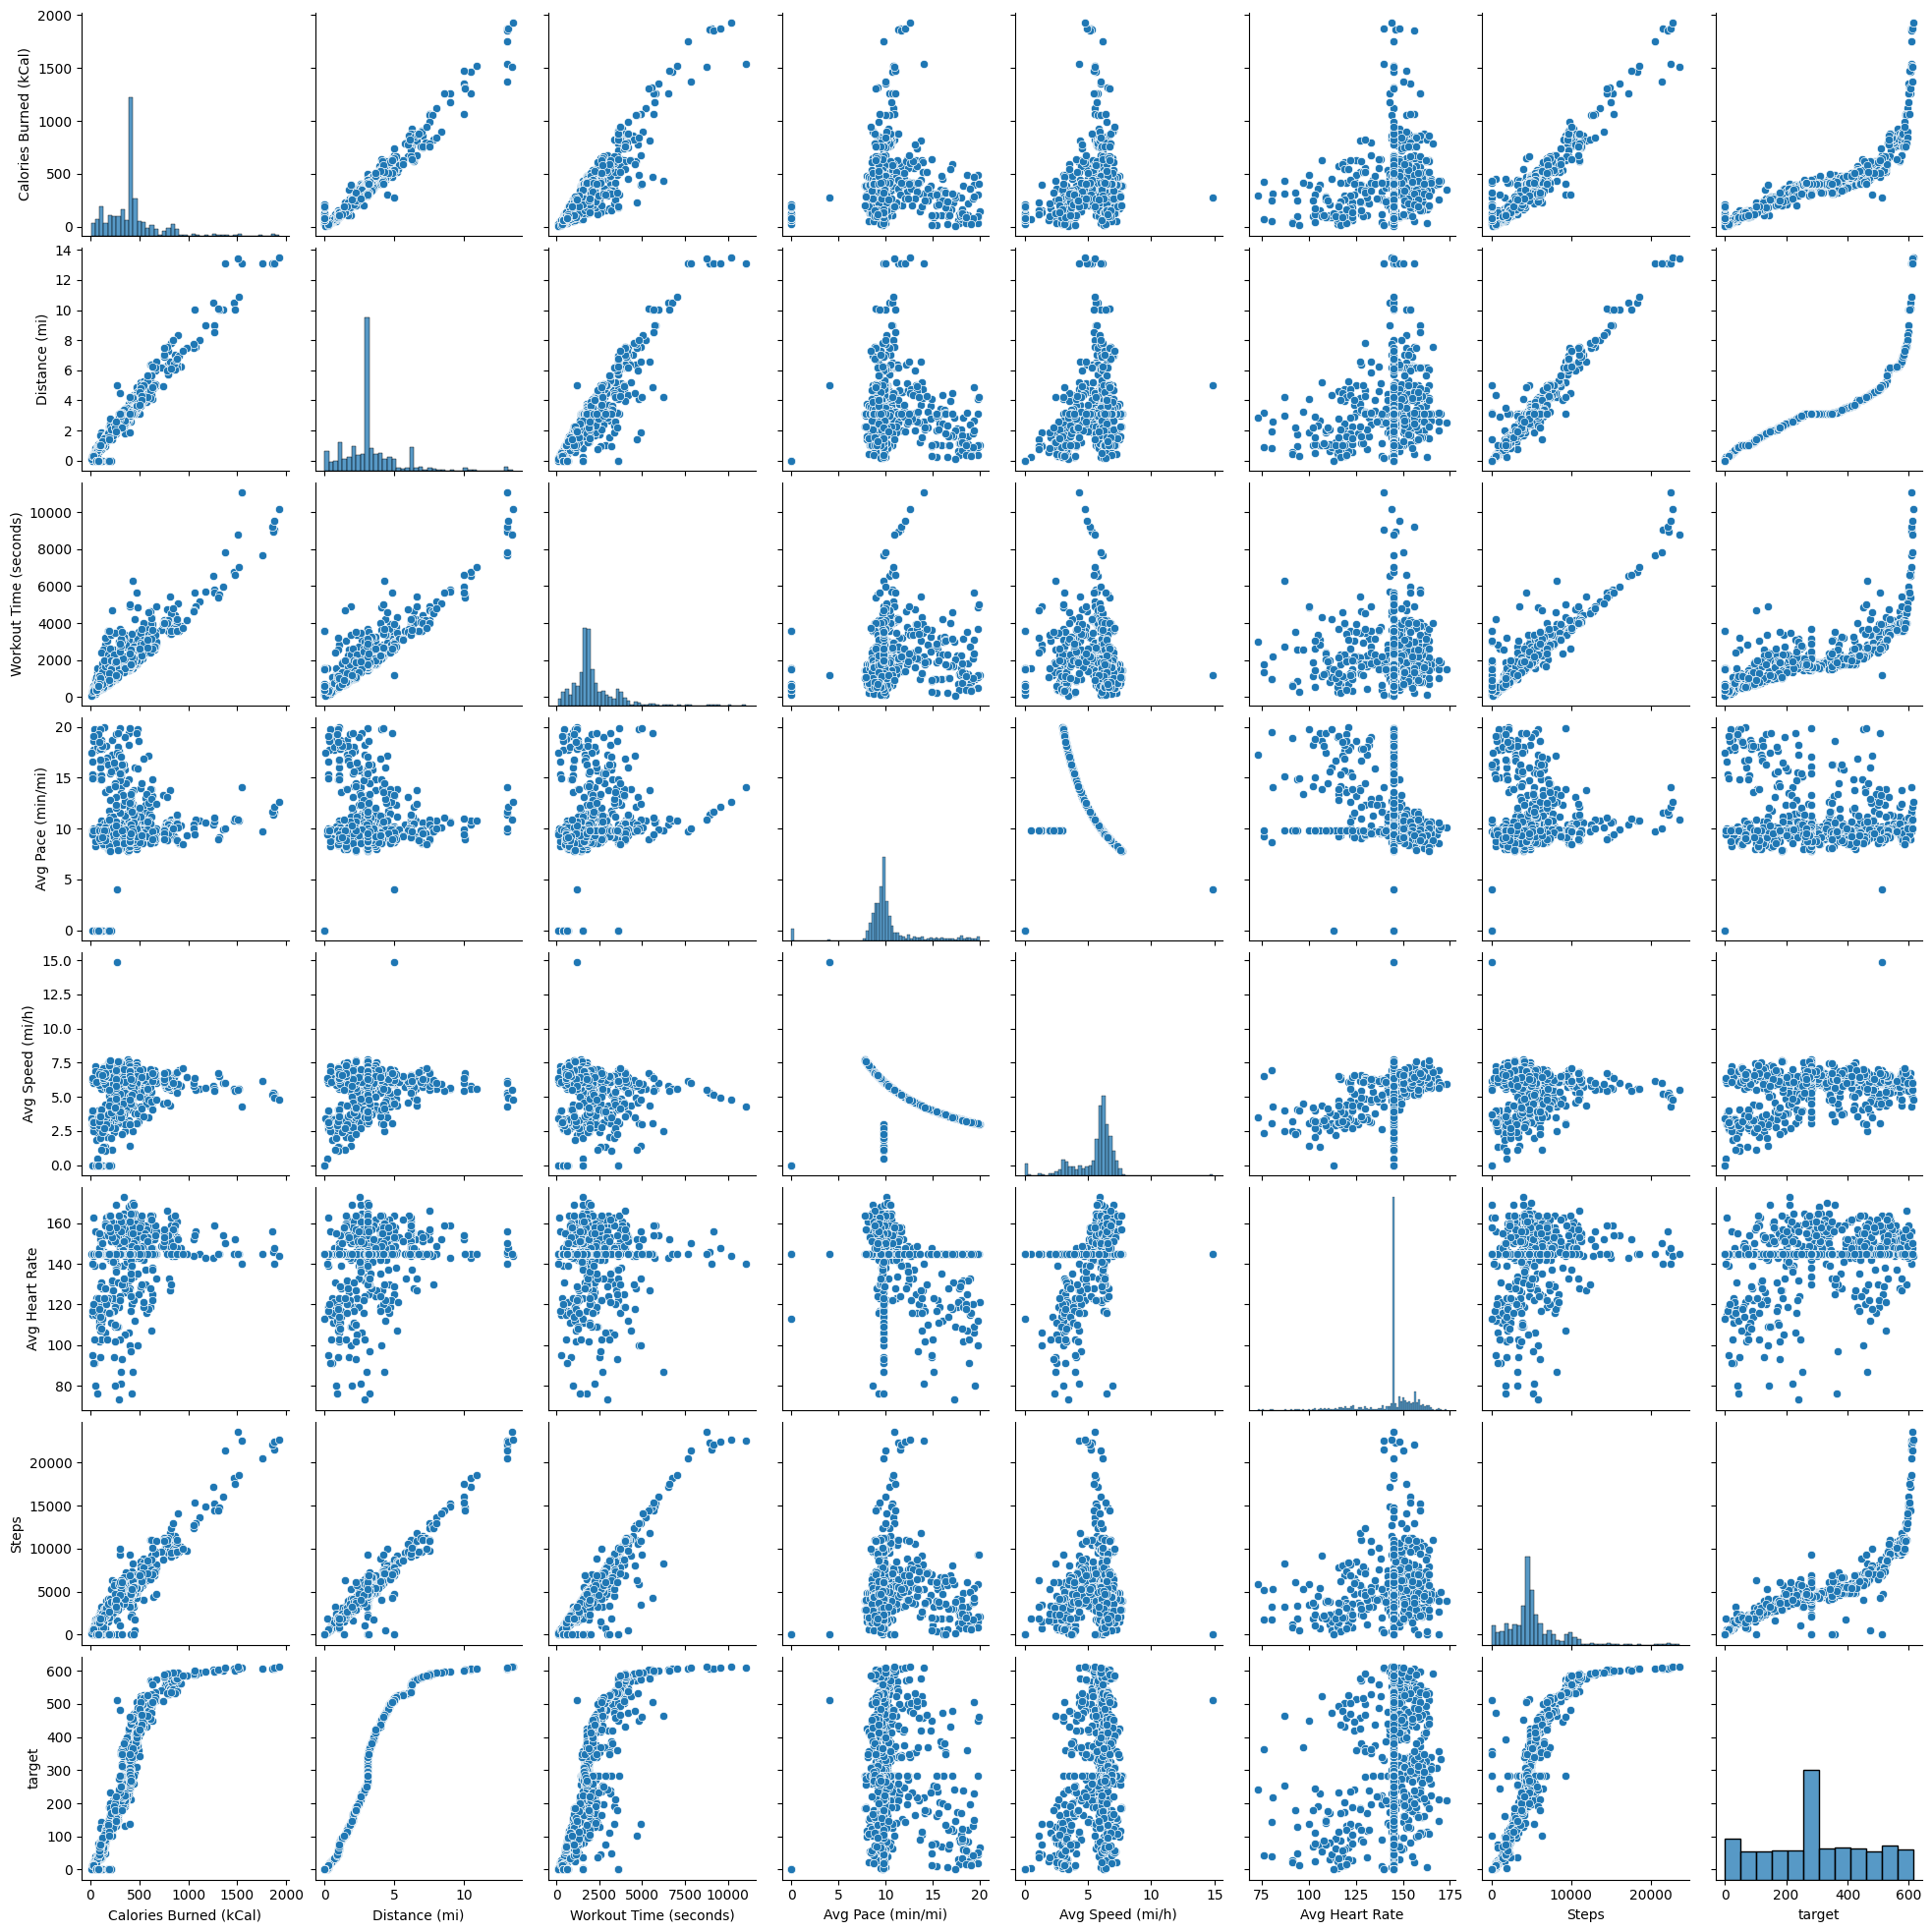

In [ ]:
sns.pairplot(data)